# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sinasc = os.path.abspath('sinasc_RO_2019.csv')

df = pd.read_csv(sinasc)

print(df.head())

   ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0       1  2679477.0      110001        1        19        5.0   
1       1  2679477.0      110001        1        29        2.0   
2       1  2679477.0      110001        1        37        9.0   
3       1  2516500.0      110001        1        30        5.0   
4       1  2516500.0      110001        1        30        2.0   

            ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  KOTELCHUCK  \
0      8 a 11 anos         NaN         0.0         0.0  ...           5   
1      8 a 11 anos    999992.0         1.0         0.0  ...           5   
2      8 a 11 anos    513205.0         2.0         0.0  ...           5   
3  12 anos ou mais    231205.0         0.0         0.0  ...           4   
4      8 a 11 anos    999992.0         1.0         0.0  ...           5   

  CONTADOR munResStatus munResTipo               munResNome  munResUf  \
0        1        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
1     

In [11]:
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'Classificação A

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [9]:
df.loc[(df['APGAR5'] >= 0) & (df['APGAR5'] <= 3), 'Classificação APGAR'] = 'asfixia severa'
df.loc[(df['APGAR5'] >= 4) & (df['APGAR5'] <= 5), 'Classificação APGAR'] = 'asfixia moderada'
df.loc[(df['APGAR5'] >= 6) & (df['APGAR5'] <= 7), 'Classificação APGAR'] = 'asfixia leve'
df.loc[(df['APGAR5'] >= 8) & (df['APGAR5'] <= 10), 'Classificação APGAR'] = 'normal'

df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,Classificação APGAR
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<Axes: xlabel='Classificação APGAR', ylabel='count'>

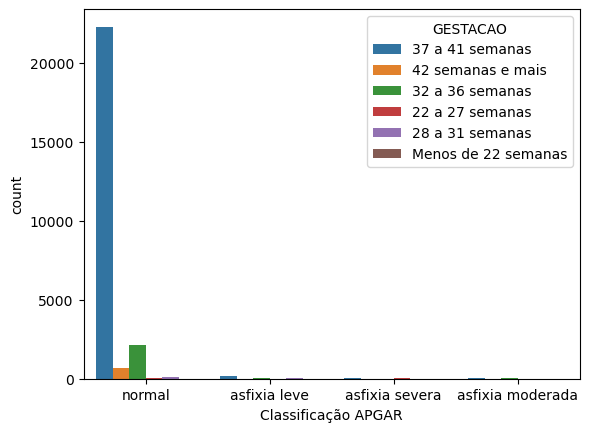

In [19]:
sns.countplot(x='Classificação APGAR'
              , hue = 'GESTACAO'
              , data=df
             )

#Com a classificação ficou melhor para observar

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [22]:
freq = pd.crosstab(df['GESTACAO'], df['Classificação APGAR'])
freq

Classificação APGAR,asfixia leve,asfixia moderada,asfixia severa,normal
GESTACAO,,,,
22 a 27 semanas,12,1,21,51
28 a 31 semanas,18,12,3,129
32 a 36 semanas,73,19,8,2134
37 a 41 semanas,196,28,33,22266
42 semanas e mais,6,1,1,690
Menos de 22 semanas,1,0,2,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [23]:
freq.sum(axis = 1)

GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2234
37 a 41 semanas        22523
42 semanas e mais        698
Menos de 22 semanas        7
dtype: int64

In [24]:
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin

Classificação APGAR,asfixia leve,asfixia moderada,asfixia severa,normal
GESTACAO,,,,
22 a 27 semanas,0.141176,0.011765,0.247059,0.600000
28 a 31 semanas,0.111111,0.074074,0.018519,0.796296
32 a 36 semanas,0.032677,0.008505,0.003581,0.955237
37 a 41 semanas,0.008702,0.001243,0.001465,0.988589
42 semanas e mais,0.008596,0.001433,0.001433,0.988539
Menos de 22 semanas,0.142857,0.000000,0.285714,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

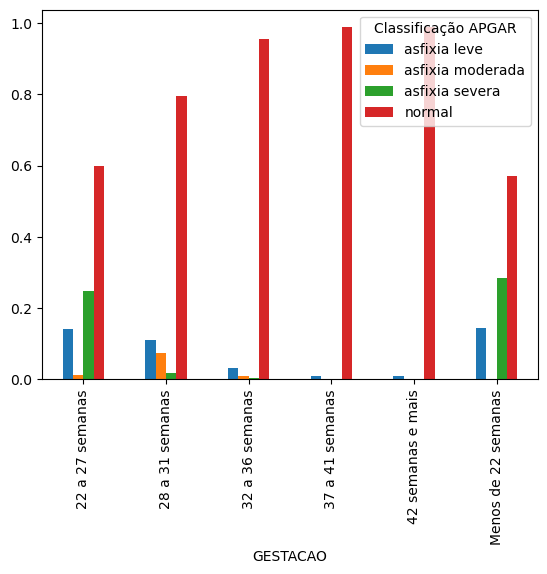

In [25]:
freq_pctlin.plot.bar()

Ao analisar o grafico de semanas de Gestação e Classificação APGAR, podemos concordar com os médicos, pois apesar de haver um grande número de nascimento sem asfixia podemos observar também que antes das 36 semanas é quando há significativos nascimentos com asfixia. Então temos que concordar com os médicos.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='Classificação APGAR', ylabel='count'>

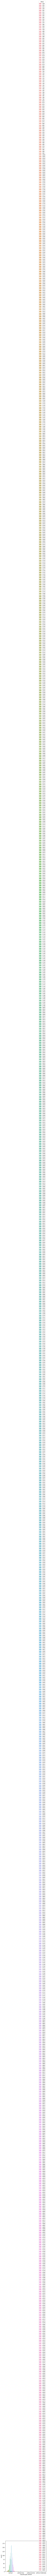

In [28]:
sns.countplot(x='Classificação APGAR'
              , hue = 'PESO'
              , data=df
             )

In [29]:
freq = pd.crosstab(df['Classificação APGAR'], df['PESO'])
freq

PESO,258,285,292,295,305,315,320,335,345,350,...,5055,5060,5065,5070,5135,5190,5470,5480,5720,5985
Classificação APGAR,,,,,,,,,,,,,,,,,,,,,
asfixia leve,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
asfixia moderada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
asfixia severa,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
normal,1,1,1,1,1,1,0,2,2,0,...,1,0,1,1,1,1,1,1,1,1


In [30]:
freq.sum(axis = 1)

Classificação APGAR
asfixia leve          320
asfixia moderada       68
asfixia severa         74
normal              26463
dtype: int64